In [4]:
import numpy as np
import pandas as pd 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import random
import os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from pathlib import Path
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [38]:
# 이미지 크기가 제각각이라 맞춤
IMAGE_WIDTH=224
IMAGE_HEIGHT=224
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

batch_size = 16

In [39]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "./CNN_Road/CNN_doro",
    validation_split=0.3,
    subset="training",
    seed=1337,
    image_size=IMAGE_SIZE,
    batch_size=batch_size,
)

Found 800 files belonging to 2 classes.
Using 560 files for training.


In [40]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    "./CNN_Road/CNN_doro",
    validation_split=0.3,
    subset="validation",
    seed=1337,
    image_size=IMAGE_SIZE,
    batch_size=batch_size,
)

Found 800 files belonging to 2 classes.
Using 240 files for validation.


In [41]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

In [42]:
augmented_train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y))

In [43]:
# Apply `data_augmentation` to the training images.
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf.data.AUTOTUNE,
)
# Prefetching samples in GPU memory helps maximize GPU utilization.
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 111, 111, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 54, 54, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 26, 26, 64)     

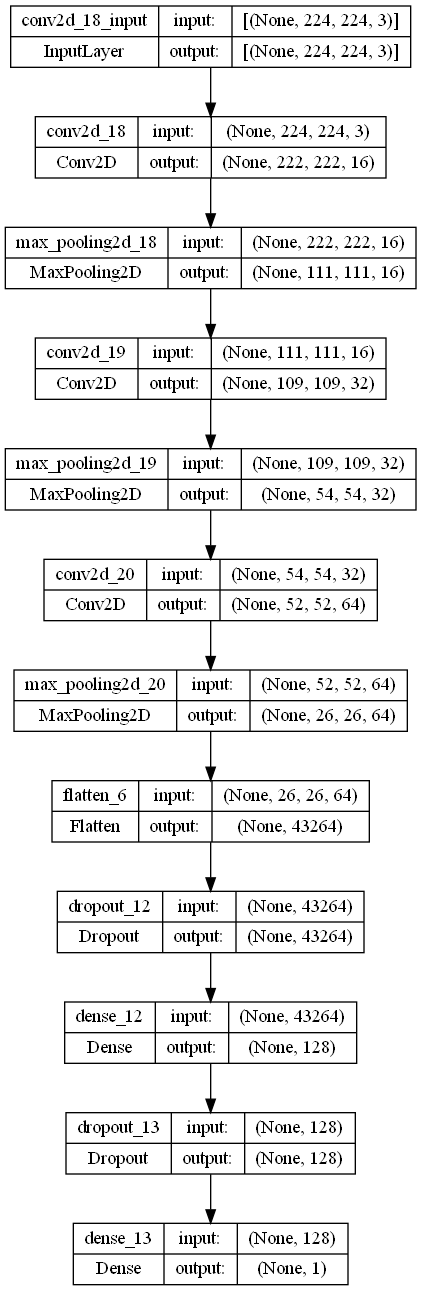

In [47]:
model = Sequential()
model.add(Conv2D(16, (3,3), input_shape=(224,224,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()
keras.utils.plot_model(model, show_shapes=True)

In [48]:
epochs = 25

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
]
model.compile(
    optimizer=keras.optimizers.Adam(0.0005),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
history=model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_ds,
)

Epoch 1/25
35/35 [==============================] - 10s 280ms/step - loss: 16.4936 - accuracy: 0.6375 - val_loss: 0.5500 - val_accuracy: 0.7917
Epoch 2/25
35/35 [==============================] - 10s 263ms/step - loss: 0.4735 - accuracy: 0.8125 - val_loss: 0.4431 - val_accuracy: 0.8583
Epoch 3/25
35/35 [==============================] - 9s 265ms/step - loss: 0.2639 - accuracy: 0.9089 - val_loss: 0.3420 - val_accuracy: 0.8833
Epoch 4/25
35/35 [==============================] - 11s 297ms/step - loss: 0.2093 - accuracy: 0.9286 - val_loss: 0.3961 - val_accuracy: 0.8583
Epoch 5/25
35/35 [==============================] - 11s 294ms/step - loss: 0.1519 - accuracy: 0.9357 - val_loss: 0.4020 - val_accuracy: 0.9083
Epoch 6/25
35/35 [==============================] - 10s 292ms/step - loss: 0.1206 - accuracy: 0.9643 - val_loss: 0.4919 - val_accuracy: 0.8458
Epoch 7/25
35/35 [==============================] - 11s 317ms/step - loss: 0.1625 - accuracy: 0.9554 - val_loss: 5.1372 - val_accuracy: 0.5667

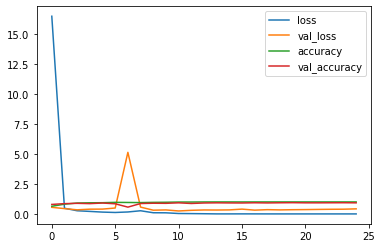

In [49]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
for each in plot_target:
    plt.plot(history.history[each], label=each)
    
plt.legend()
plt.show()

In [50]:
model.save('CNN_Road_2classes.h5')